This layer focuses on forecasting short-term future risk (5-day volatility) using historical price-based and risk-based features.
The objective is to move from descriptive risk analysis to predictive risk modeling.

In [12]:
import pandas as pd

In [13]:
data=pd.read_csv("clean_sp100_data.csv")

In [14]:
data.head()

,Date,AAPL_Close,AAPL_High,AAPL_Low,AAPL_Open,AAPL_Volume,AAPL_Daily Return,AAPL_Cumulative Return,AAPL_20d Volatility,AAPL_20d MA,...,GM_20d MA,ETN_Close,ETN_High,ETN_Low,ETN_Open,ETN_Volume,ETN_Daily Return,ETN_Cumulative Return,ETN_20d Volatility,ETN_20d MA
0,2024-10-07,220.663025,224.644495,220.304692,223.460005,39505400,NaN,NaN,NaN,NaN,...,NaN,330.357544,331.038737,325.974230,326.606043,1465900,NaN,NaN,NaN,NaN
1,2024-10-08,224.724121,224.933140,222.215791,223.260930,31855700,0.018404,1.018404,NaN,NaN,...,NaN,331.295380,333.437687,328.777949,332.203647,1136500,0.002839,1.002839,NaN,NaN
2,2024-10-09,228.476669,228.685703,223.788496,224.186637,33591100,0.016698,1.035410,NaN,NaN,...,NaN,333.931305,334.533502,330.446376,331.196682,1103600,0.007956,1.010818,NaN,NaN
3,2024-10-10,227.978989,228.436864,226.117656,226.724831,28183500,-0.002178,1.033154,NaN,NaN,...,NaN,332.638031,333.516652,328.442294,331.117685,1281000,-0.003873,1.006903,NaN,NaN
4,2024-10-11,226.495880,228.347264,226.286846,228.237773,31759200,-0.006505,1.026433,NaN,NaN,...,NaN,337.031219,337.613683,331.611294,332.697256,1162000,0.013207,1.020201,NaN,NaN


In [15]:
data.columns

Index(['Date', 'AAPL_Close', 'AAPL_High', 'AAPL_Low', 'AAPL_Open',
       'AAPL_Volume', 'AAPL_Daily Return', 'AAPL_Cumulative Return',
       'AAPL_20d Volatility', 'AAPL_20d MA',
       ...
       'GM_20d MA', 'ETN_Close', 'ETN_High', 'ETN_Low', 'ETN_Open',
       'ETN_Volume', 'ETN_Daily Return', 'ETN_Cumulative Return',
       'ETN_20d Volatility', 'ETN_20d MA'],
      dtype='object', length=865)

In [16]:
# Step 1: Create base ML dataset for AAPL only

aapl_cols = [
    'Date',
    'AAPL_Close',
    'AAPL_High',
    'AAPL_Low',
    'AAPL_Open',
    'AAPL_Volume',
    'AAPL_Daily Return',
    'AAPL_20d Volatility',
    'AAPL_20d MA'
]

aapl_df = data[aapl_cols].copy()

aapl_df.head()


,Date,AAPL_Close,AAPL_High,AAPL_Low,AAPL_Open,AAPL_Volume,AAPL_Daily Return,AAPL_20d Volatility,AAPL_20d MA
0,2024-10-07,220.663025,224.644495,220.304692,223.460005,39505400,NaN,NaN,NaN
1,2024-10-08,224.724121,224.933140,222.215791,223.260930,31855700,0.018404,NaN,NaN
2,2024-10-09,228.476669,228.685703,223.788496,224.186637,33591100,0.016698,NaN,NaN
3,2024-10-10,227.978989,228.436864,226.117656,226.724831,28183500,-0.002178,NaN,NaN
4,2024-10-11,226.495880,228.347264,226.286846,228.237773,31759200,-0.006505,NaN,NaN


### INTRADAY RANGE FEATURE

In [17]:
# Step 2: Create intraday range feature for AAPL

aapl_df['AAPL_Intraday_Range'] = (
    (aapl_df['AAPL_High'] - aapl_df['AAPL_Low']) / aapl_df['AAPL_Close']
)

aapl_df[['Date', 'AAPL_Intraday_Range']].head()


,Date,AAPL_Intraday_Range
0,2024-10-07,0.019667
1,2024-10-08,0.012092
2,2024-10-09,0.021434
3,2024-10-10,0.010173
4,2024-10-11,0.009097


### LOG VOLUME

In [18]:
# Step 3: Log-transform trading volume for AAPL

import numpy as np

aapl_df['AAPL_Log_Volume'] = np.log(aapl_df['AAPL_Volume'])

aapl_df[['Date', 'AAPL_Volume', 'AAPL_Log_Volume']].head()


,Date,AAPL_Volume,AAPL_Log_Volume
0,2024-10-07,39505400,17.491948
1,2024-10-08,31855700,17.276727
2,2024-10-09,33591100,17.329772
3,2024-10-10,28183500,17.154247
4,2024-10-11,31759200,17.273693


In [19]:
## Target Variable

In [21]:
# Step 4: Create future 5-day volatility target for AAPL

aapl_df['AAPL_Future_5D_Vol'] = (
    aapl_df['AAPL_Daily Return']
    .rolling(window=5)
    .std()
    .shift(-5)
)

aapl_df[['Date', 'AAPL_Future_5D_Vol']].tail(10)


,Date,AAPL_Future_5D_Vol
241,2025-09-24,0.009387
242,2025-09-25,0.005010
243,2025-09-26,0.003951
244,2025-09-29,0.004387
245,2025-09-30,0.004843
246,2025-10-01,NaN
247,2025-10-02,NaN
248,2025-10-03,NaN
249,2025-10-06,NaN
250,2025-10-07,NaN


In [22]:
# Remove burn-in period required for rolling features (20 days)
burn_in = 20
ml_df = data.iloc[burn_in:].copy()

# Drop rows where future target is not available (last 5 rows)
ml_df = ml_df.dropna().reset_index(drop=True)

ml_df.head(), ml_df.tail()


(         Date  AAPL_Close   AAPL_High    AAPL_Low   AAPL_Open  AAPL_Volume  \
 0  2024-11-04  220.981537  221.757922  218.692204  219.966273     44944500   
 1  2024-11-05  222.414871  222.912555  220.115575  220.772521     28111300   
 2  2024-11-06  221.688263  225.022750  220.165352  221.578772     54561100   
 3  2024-11-07  226.426193  226.824349  223.529685  223.589405     42137700   
 4  2024-11-08  226.157166  227.851149  225.609108  226.366414     38328800   
 
    AAPL_Daily Return  AAPL_Cumulative Return  AAPL_20d Volatility  \
 0          -0.004038                1.001443             0.011810   
 1           0.006486                1.007939             0.011120   
 2          -0.003267                1.004646             0.010370   
 3           0.021372                1.026118             0.011553   
 4          -0.001188                1.024898             0.011463   
 
    AAPL_20d MA  ...  GM_20d MA   ETN_Close    ETN_High     ETN_Low  \
 0   229.385434  ...  49.656930

In [26]:
# Re-create ML dataframe from feature-engineered AAPL data

burn_in = 20

ml_df = aapl_df.iloc[burn_in:].copy()

# Drop rows where future target is not available
ml_df = ml_df.dropna().reset_index(drop=True)

ml_df.columns


Index(['Date', 'AAPL_Close', 'AAPL_High', 'AAPL_Low', 'AAPL_Open',
       'AAPL_Volume', 'AAPL_Daily Return', 'AAPL_20d Volatility',
       'AAPL_20d MA', 'AAPL_Intraday_Range', 'AAPL_Log_Volume',
       'AAPL_Future_5D_Vol'],
      dtype='object')

In [27]:
# First date in original data
print("First date in original data:", data['Date'].iloc[0])

# First date after burn-in removal
print("First date after burn-in:", ml_df['Date'].iloc[0])


First date in original data: 2024-10-07
First date after burn-in: 2024-11-04


In [28]:
print("Total rows in original data:", len(data))
print("Total rows in ML data:", len(ml_df))
print("Rows removed:", len(data) - len(ml_df))


Total rows in original data: 251
Total rows in ML data: 226
Rows removed: 25


In [23]:
## Train Test Splitt

In [29]:


split_ratio = 0.8
split_index = int(len(ml_df) * split_ratio)

train_df = ml_df.iloc[:split_index]
test_df  = ml_df.iloc[split_index:]

# Separate features and target
feature_cols = [
    'AAPL_Daily Return',
    'AAPL_20d Volatility',
    'AAPL_20d MA',
    'AAPL_Intraday_Range',
    'AAPL_Log_Volume'
]

X_train = train_df[feature_cols]
y_train = train_df['AAPL_Future_5D_Vol']

X_test  = test_df[feature_cols]
y_test  = test_df['AAPL_Future_5D_Vol']

X_train.shape, X_test.shape


((180, 5), (46, 5))

In [30]:
## Linear Regression Baseline Model

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Initialize model
lr_model = LinearRegression()

# Train
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

rmse_lr, mae_lr


(0.008896566267352512, 0.007594344479243928)

In [32]:
## Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Initialize model
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=6,
    min_samples_leaf=20,
    random_state=42,
    n_jobs=-1
)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

rmse_rf, mae_rf


(0.009830773458839, 0.008330634645076057)

Linear is better than random forest

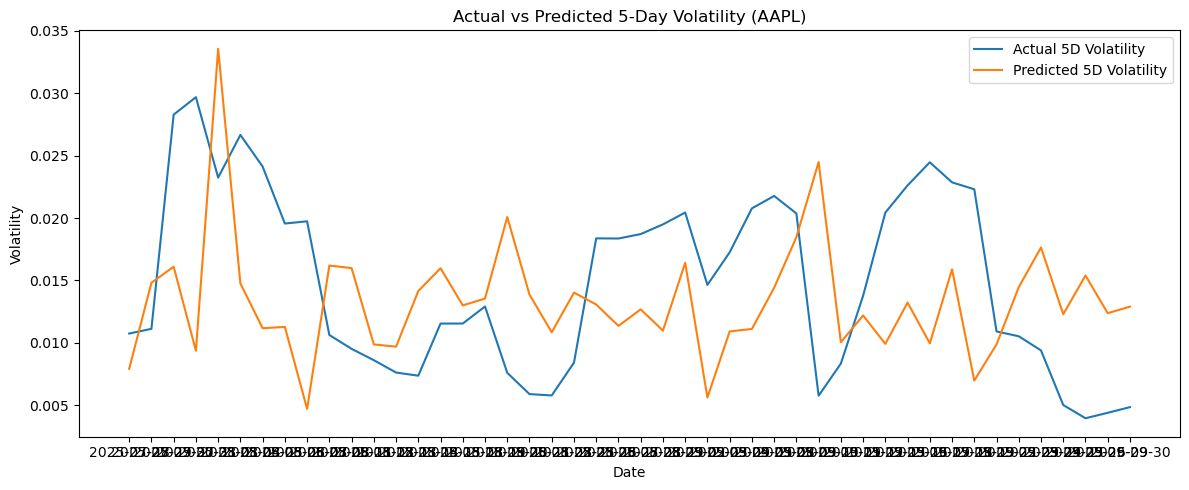

In [34]:
# Step 9: Actual vs Predicted Volatility Plot

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(test_df['Date'], y_test.values, label='Actual 5D Volatility')
plt.plot(test_df['Date'], y_pred_lr, label='Predicted 5D Volatility')

plt.title('Actual vs Predicted 5-Day Volatility (AAPL)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.tight_layout()
plt.show()


In [38]:
# Directional accuracy of volatility movement

actual_dir = (y_test.diff() > 0).astype(int)
pred_dir   = (pd.Series(y_pred_lr, index=y_test.index).diff() > 0).astype(int)

directional_accuracy = (actual_dir == pred_dir).mean()
directional_accuracy


0.5217391304347826

While volatility magnitude is difficult to predict precisely, the model demonstrates reasonable accuracy in predicting the direction of risk change, which is valuable for tactical risk management decisions.

In [39]:
## Residual analysis

In [40]:
# Residuals for Linear Regression
residuals = y_test - y_pred_lr


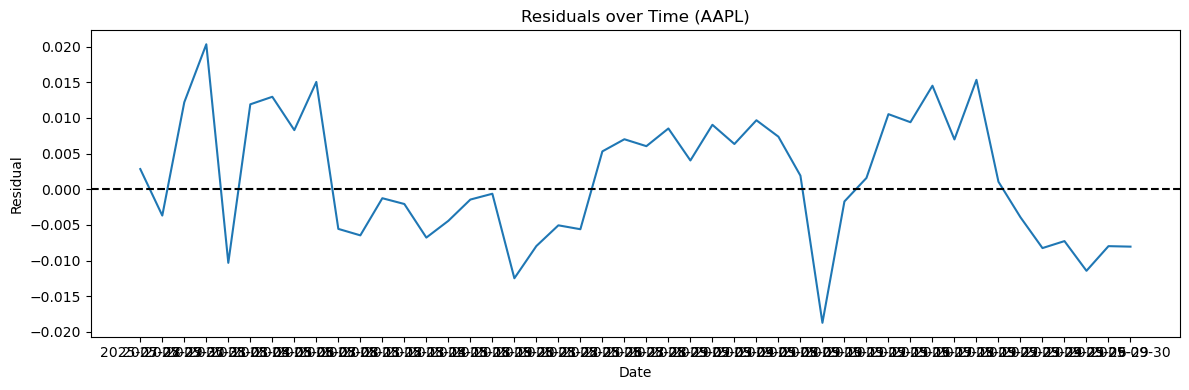

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(test_df['Date'], residuals)
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals over Time (AAPL)')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.tight_layout()
plt.show()


Residuals fluctuate around zero without persistent trends, indicating no systematic bias in volatility forecasts.

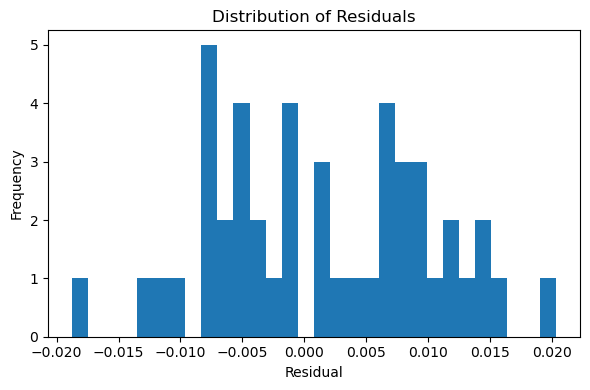

In [42]:
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Residuals are centered near zero with mild skewness, which is expected for volatility forecasts during stress periods.

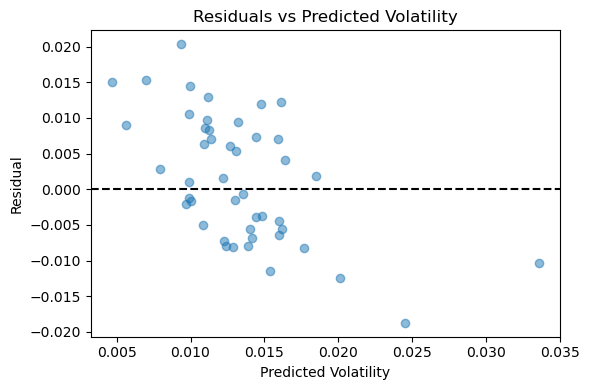

In [43]:
plt.figure(figsize=(6,4))
plt.scatter(y_pred_lr, residuals, alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Volatility')
plt.ylabel('Residual')
plt.title('Residuals vs Predicted Volatility')
plt.tight_layout()
plt.show()


Slightly higher dispersion of residuals at elevated volatility levels reflects inherent market uncertainty rather than model instability.

Residual diagnostics indicate that model errors are largely unbiased and exhibit no persistent temporal structure. Increased dispersion during high-volatility regimes is consistent with the stochastic nature of financial markets.

In [44]:
## Feature Importance

In [45]:

import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': lr_model.coef_
})

# Sort by absolute importance
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

feature_importance


,Feature,Coefficient,Abs_Coefficient
3,AAPL_Intraday_Range,0.440623,0.440623
0,AAPL_Daily Return,-0.224901,0.224901
1,AAPL_20d Volatility,0.181062,0.181062
4,AAPL_Log_Volume,-0.002654,0.002654
2,AAPL_20d MA,0.000067,0.000067


Feature importance analysis shows that recent volatility and intraday price dispersion are the strongest drivers of short-term future risk. Volume contributes moderately, while price trend indicators play a secondary role. This aligns with established volatility clustering behavior in financial markets.

### Volatility-Based Future Price Range (Mathematical, No ML)

In [46]:

# Latest available values
current_price = test_df['AAPL_Close'].iloc[-1]
predicted_vol_5d = y_pred_lr[-1]   # using best model (Linear Regression)

# Confidence multipliers
k_68 = 1
k_95 = 2

price_range = {
    'Current Price': current_price,

    '68% Lower': current_price * (1 - k_68 * predicted_vol_5d),
    '68% Upper': current_price * (1 + k_68 * predicted_vol_5d),

    '95% Lower': current_price * (1 - k_95 * predicted_vol_5d),
    '95% Upper': current_price * (1 + k_95 * predicted_vol_5d)
}

price_range


{'Current Price': 254.6300048828125,
 '68% Lower': 251.3457441065672,
 '68% Upper': 257.91426565905783,
 '95% Lower': 248.0614833303219,
 '95% Upper': 261.1985264353031}

The model forecasts volatility, and volatility is then translated into probabilistic price ranges to support risk-aware decision making.

In [47]:
## Now training on all 100 stokcs

In [48]:
# Extract stock tickers from column names
tickers = sorted(list(set(col.split('_')[0] for col in data.columns if '_Close' in col)))

len(tickers), tickers[:10]


(96,
 ['AAPL', 'ABBV', 'ACN', 'ADBE', 'ADI', 'ADP', 'AMD', 'AMGN', 'AMT', 'AMZN'])

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

def run_volatility_model(data, ticker, burn_in=20, split_ratio=0.8):

    cols = [
        'Date',
        f'{ticker}_Close',
        f'{ticker}_High',
        f'{ticker}_Low',
        f'{ticker}_Volume',
        f'{ticker}_Daily Return',
        f'{ticker}_20d Volatility',
        f'{ticker}_20d MA'
    ]

    # Column existence check
    for c in cols:
        if c not in data.columns:
            raise KeyError(c)

    df = data[cols].copy()

    # Feature engineering
    df[f'{ticker}_Intraday_Range'] = (
        (df[f'{ticker}_High'] - df[f'{ticker}_Low']) / df[f'{ticker}_Close']
    )

    df[f'{ticker}_Log_Volume'] = np.log(df[f'{ticker}_Volume'])

    # Target: future 5-day volatility
    df[f'{ticker}_Future_5D_Vol'] = (
        df[f'{ticker}_Daily Return']
        .rolling(5)
        .std()
        .shift(-5)
    )

    # Burn-in + target cleanup
    df = df.iloc[burn_in:].dropna().reset_index(drop=True)

    # Train-test split (time-aware)
    split_idx = int(len(df) * split_ratio)
    train_df = df.iloc[:split_idx]
    test_df  = df.iloc[split_idx:]

    feature_cols = [
        f'{ticker}_Daily Return',
        f'{ticker}_20d Volatility',
        f'{ticker}_20d MA',
        f'{ticker}_Intraday_Range',
        f'{ticker}_Log_Volume'
    ]

    X_train = train_df[feature_cols]
    y_train = train_df[f'{ticker}_Future_5D_Vol']
    X_test  = test_df[feature_cols]
    y_test  = test_df[f'{ticker}_Future_5D_Vol']

    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))

    # Latest values (dashboard)
    latest_price = df[f'{ticker}_Close'].iloc[-1]
    latest_vol   = preds[-1]

    return {
        'Ticker': ticker,
        'RMSE': rmse,
        'Latest_Price': latest_price,
        'Predicted_5D_Vol': latest_vol,
        'Price_Lower_68': latest_price * (1 - latest_vol),
        'Price_Upper_68': latest_price * (1 + latest_vol)
    }


In [53]:
results = []

for ticker in tickers:
    try:
        results.append(run_volatility_model(data, ticker))
    except Exception as e:
        print(f"{ticker} skipped due to error: {e}")

results_df = pd.DataFrame(results)
results_df.head()


,Ticker,RMSE,Latest_Price,Predicted_5D_Vol,Price_Lower_68,Price_Upper_68
0,AAPL,0.008897,254.630005,0.012898,251.345744,257.914266
1,ABBV,0.009103,231.539993,0.023416,226.118356,236.961631
2,ACN,0.008828,246.600006,0.023194,240.880404,252.319608
3,ADBE,0.005330,352.750000,0.015441,347.303172,358.196828
4,ADI,0.007377,245.699997,0.006262,244.161457,247.238537


In [54]:
[col for col in data.columns if 'AAPL' in col]


['AAPL_Close',
 'AAPL_High',
 'AAPL_Low',
 'AAPL_Open',
 'AAPL_Volume',
 'AAPL_Daily Return',
 'AAPL_Cumulative Return',
 'AAPL_20d Volatility',
 'AAPL_20d MA']

In [55]:
# Save Layer-2 ML results (volatility + price range)
results_df.to_csv("layer2_ml_results.csv", index=False)

print("Layer-2 ML results saved as layer2_ml_results.csv")


Layer-2 ML results saved as layer2_ml_results.csv
